# **FGV EESP**

- ## Análise de Estacionariedade - Expectativa de Inflação
---



### **Bibliotecas**

In [ ]:
# Testes de raiz unitária
install.packages("urca")

In [ ]:
library(dplyr)
library(ggplot2)
library(httr)
library(lubridate)
library(readxl)
library(urca)
library(tidyverse)
library(zoo)

### **Dados**

In [3]:
# Caminho do arquivo original
file_path <- "https://github.com/matheusrmorgado/inflation-expectation/raw/main/data/public_data.xlsx"

# Download do arquivo
download.file(file_path, "public_data.xlsx")

# Ler o arquivo Excel e converter em dataframe
df_public_data <- as.data.frame(read_excel("public_data.xlsx"))

# Converter year e month_name
df_public_data <- df_public_data %>%
  mutate(year = as.numeric(year),  # Converter year para numérico
         month_name = factor(month_name, levels = month.abb, ordered = TRUE))  # Converter month_name para um fator ordenado

# Converter month_date
df_public_data$month_date <- ymd(df_public_data$month_date)  # Converter month_date para formato Date

# Lista de variáveis para transformar em séries temporais
vars_to_convert <- c("month", "market_inflation_expectation", "consumer_inflation_expectation", "inflation_target", "inflation_target_lower_bound", "inflation_target_upper_bound", "inflation_target_wtd_avg", "inflation_target_lower_bound_wtd_avg", "inflation_target_upper_bound_wtd_avg", "ipca", "selic", "selic_deflated", "minimum_wage_increase", "minimum_wage_increase_deflated", "income_increase", "income_increase_deflated", "household_income_deflated", "household_income_deflated_trend", "household_income_deflated_trend_diff", "real_exchange_rate", "real_exchange_rate_trend", "real_exchange_rate_trend_diff", "pib", "primary_fiscal_result", "primary_fiscal_result_pct_pib", "ipca_lag", "selic_deflated_lag", "primary_fiscal_result_pct_pib_lag", "real_exchange_rate_trend_diff_lag", "household_income_deflated_trend_diff_lag")

# Loop para transformar as variáveis em séries temporais
for (var in vars_to_convert) {
  df_public_data[[var]] <- ts(df_public_data[[var]], start = c(2006, 1), frequency = 12)
}

In [4]:
head(df_public_data, 5)

,year,month_name,month_date,month,market_inflation_expectation,consumer_inflation_expectation,inflation_target,inflation_target_lower_bound,inflation_target_upper_bound,inflation_target_wtd_avg,⋯,real_exchange_rate_trend,real_exchange_rate_trend_diff,pib,primary_fiscal_result,primary_fiscal_result_pct_pib,ipca_lag,selic_deflated_lag,primary_fiscal_result_pct_pib_lag,real_exchange_rate_trend_diff_lag,household_income_deflated_trend_diff_lag
,<dbl>,<ord>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2006,Jan,2006-01-01,2006.000,4.58,6.9,4.5,2.5,6.5,4.5,⋯,98.40322,2.313721,2190643,-74923.44,-3.42,5.69,11.87435,-3.74,2.147822,2.754730
2,2006,Feb,2006-02-01,2006.083,4.49,7.0,4.5,2.5,6.5,4.5,⋯,98.02805,-2.640109,2207671,-74569.50,-3.38,5.70,11.30558,-3.42,2.313721,2.488664
3,2006,Mar,2006-03-01,2006.167,4.36,6.9,4.5,2.5,6.5,4.5,⋯,97.65292,-2.419715,2225145,-73223.35,-3.29,5.51,11.15534,-3.38,-2.640109,2.064065
4,2006,Apr,2006-04-01,2006.250,4.16,6.5,4.5,2.5,6.5,4.5,⋯,97.27786,-2.197685,2235813,-74002.58,-3.31,5.32,10.84314,-3.29,-2.419715,1.706890
5,2006,May,2006-05-01,2006.333,4.18,6.7,4.5,2.5,6.5,4.5,⋯,96.90286,2.484076,2256419,-74308.97,-3.29,4.63,11.04846,-3.31,-2.197685,1.268233


### **Análise de Estacionariedade**

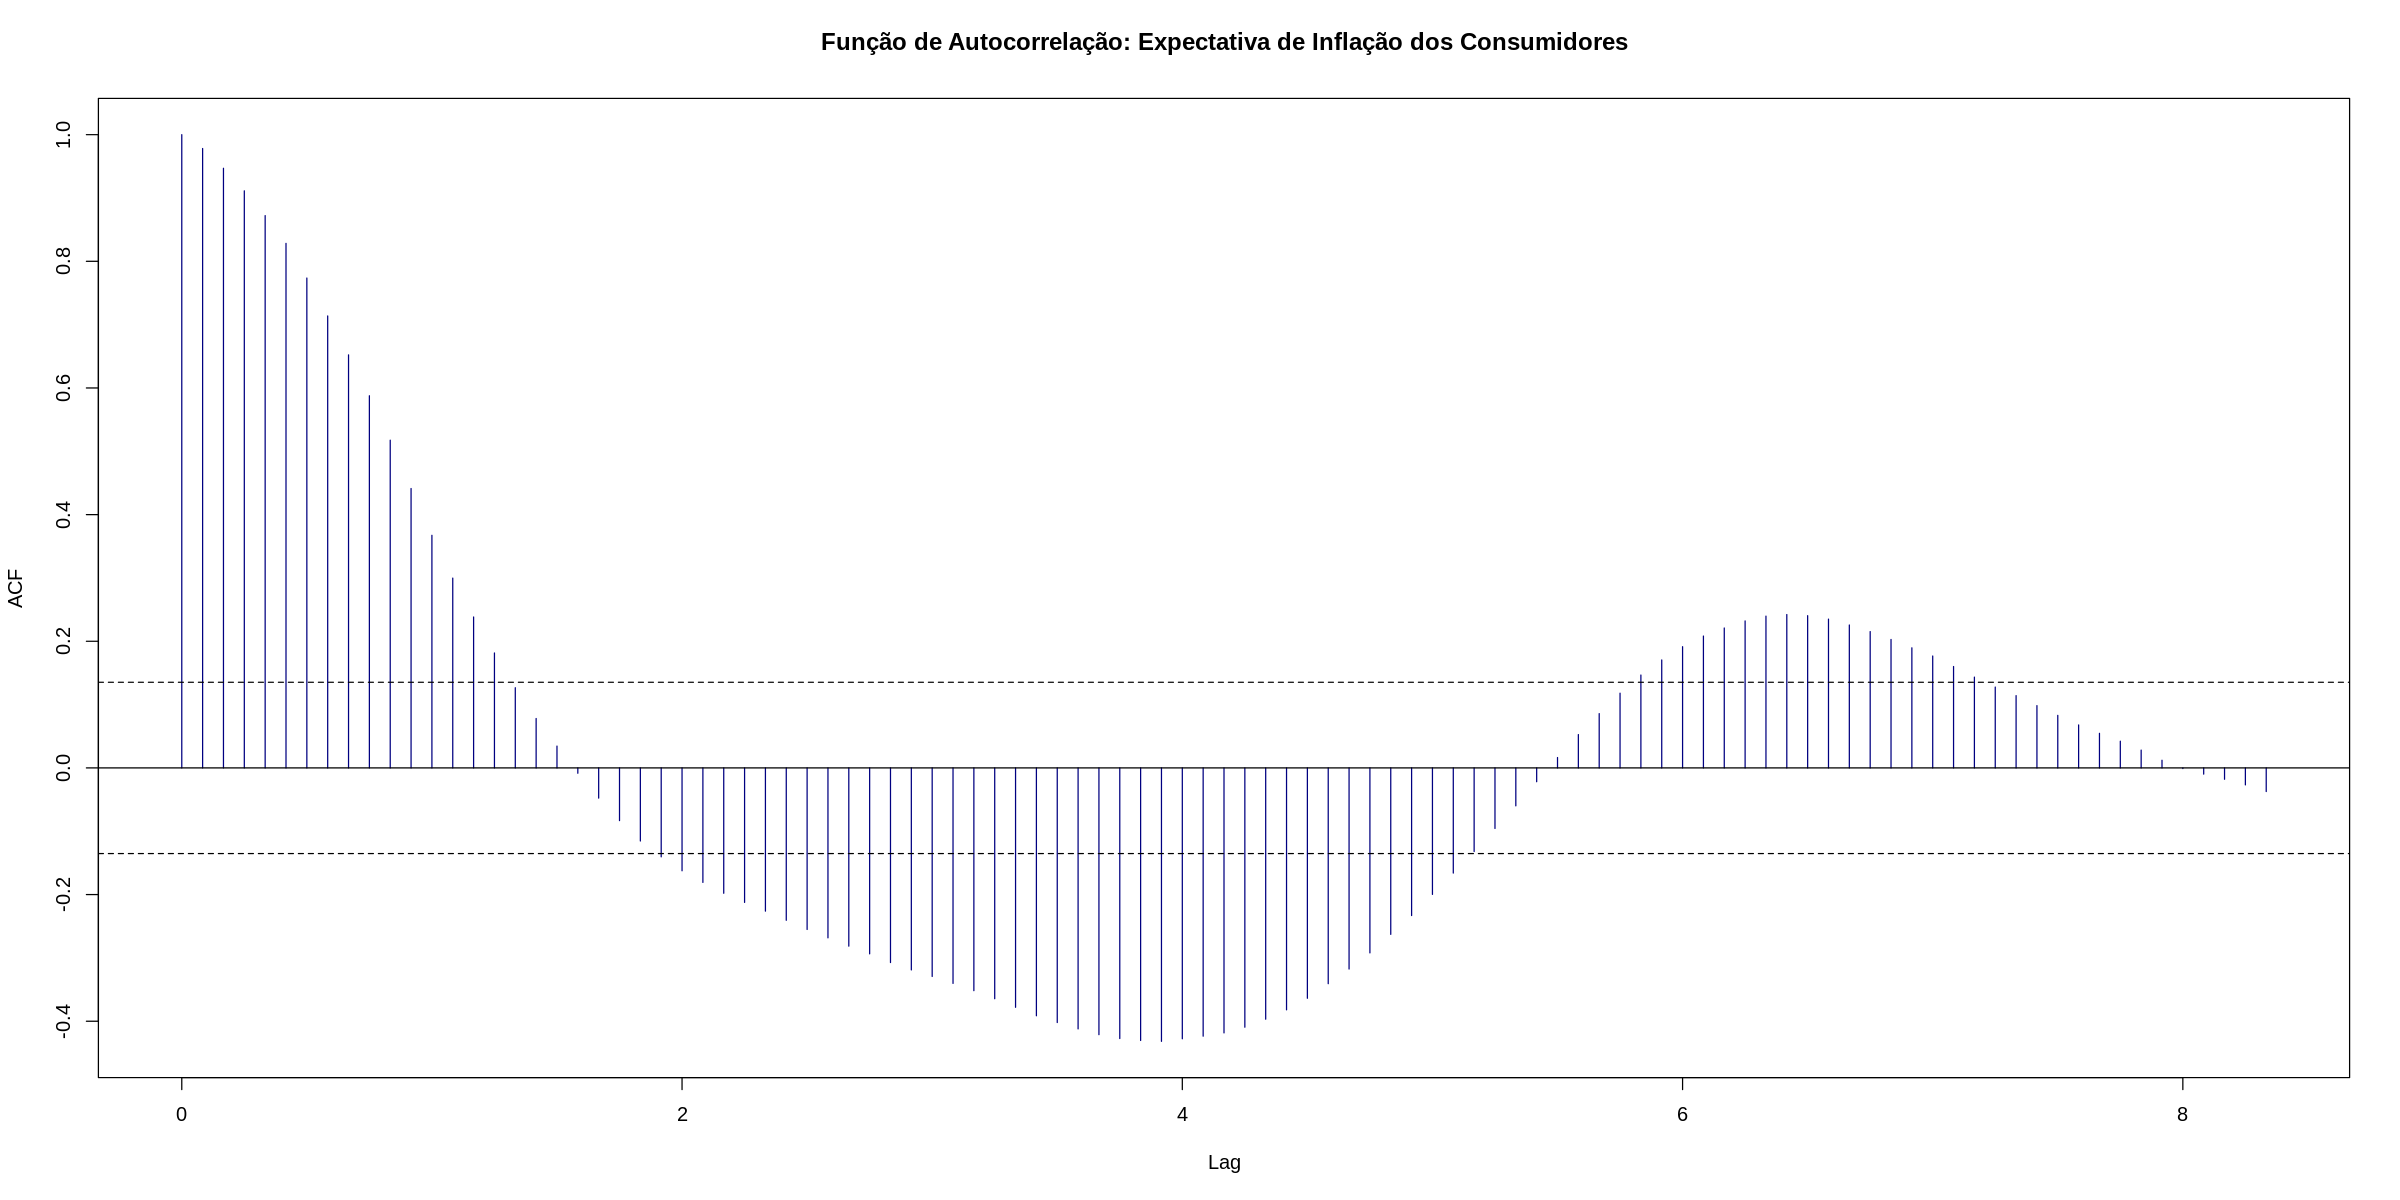

In [5]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Função de Autocorrelação
acf(df_public_data$consumer_inflation_expectation,
    main = "Função de Autocorrelação: Expectativa de Inflação dos Consumidores",
    col = "navy",
    ci.col = "black",
    lag.max = 100)

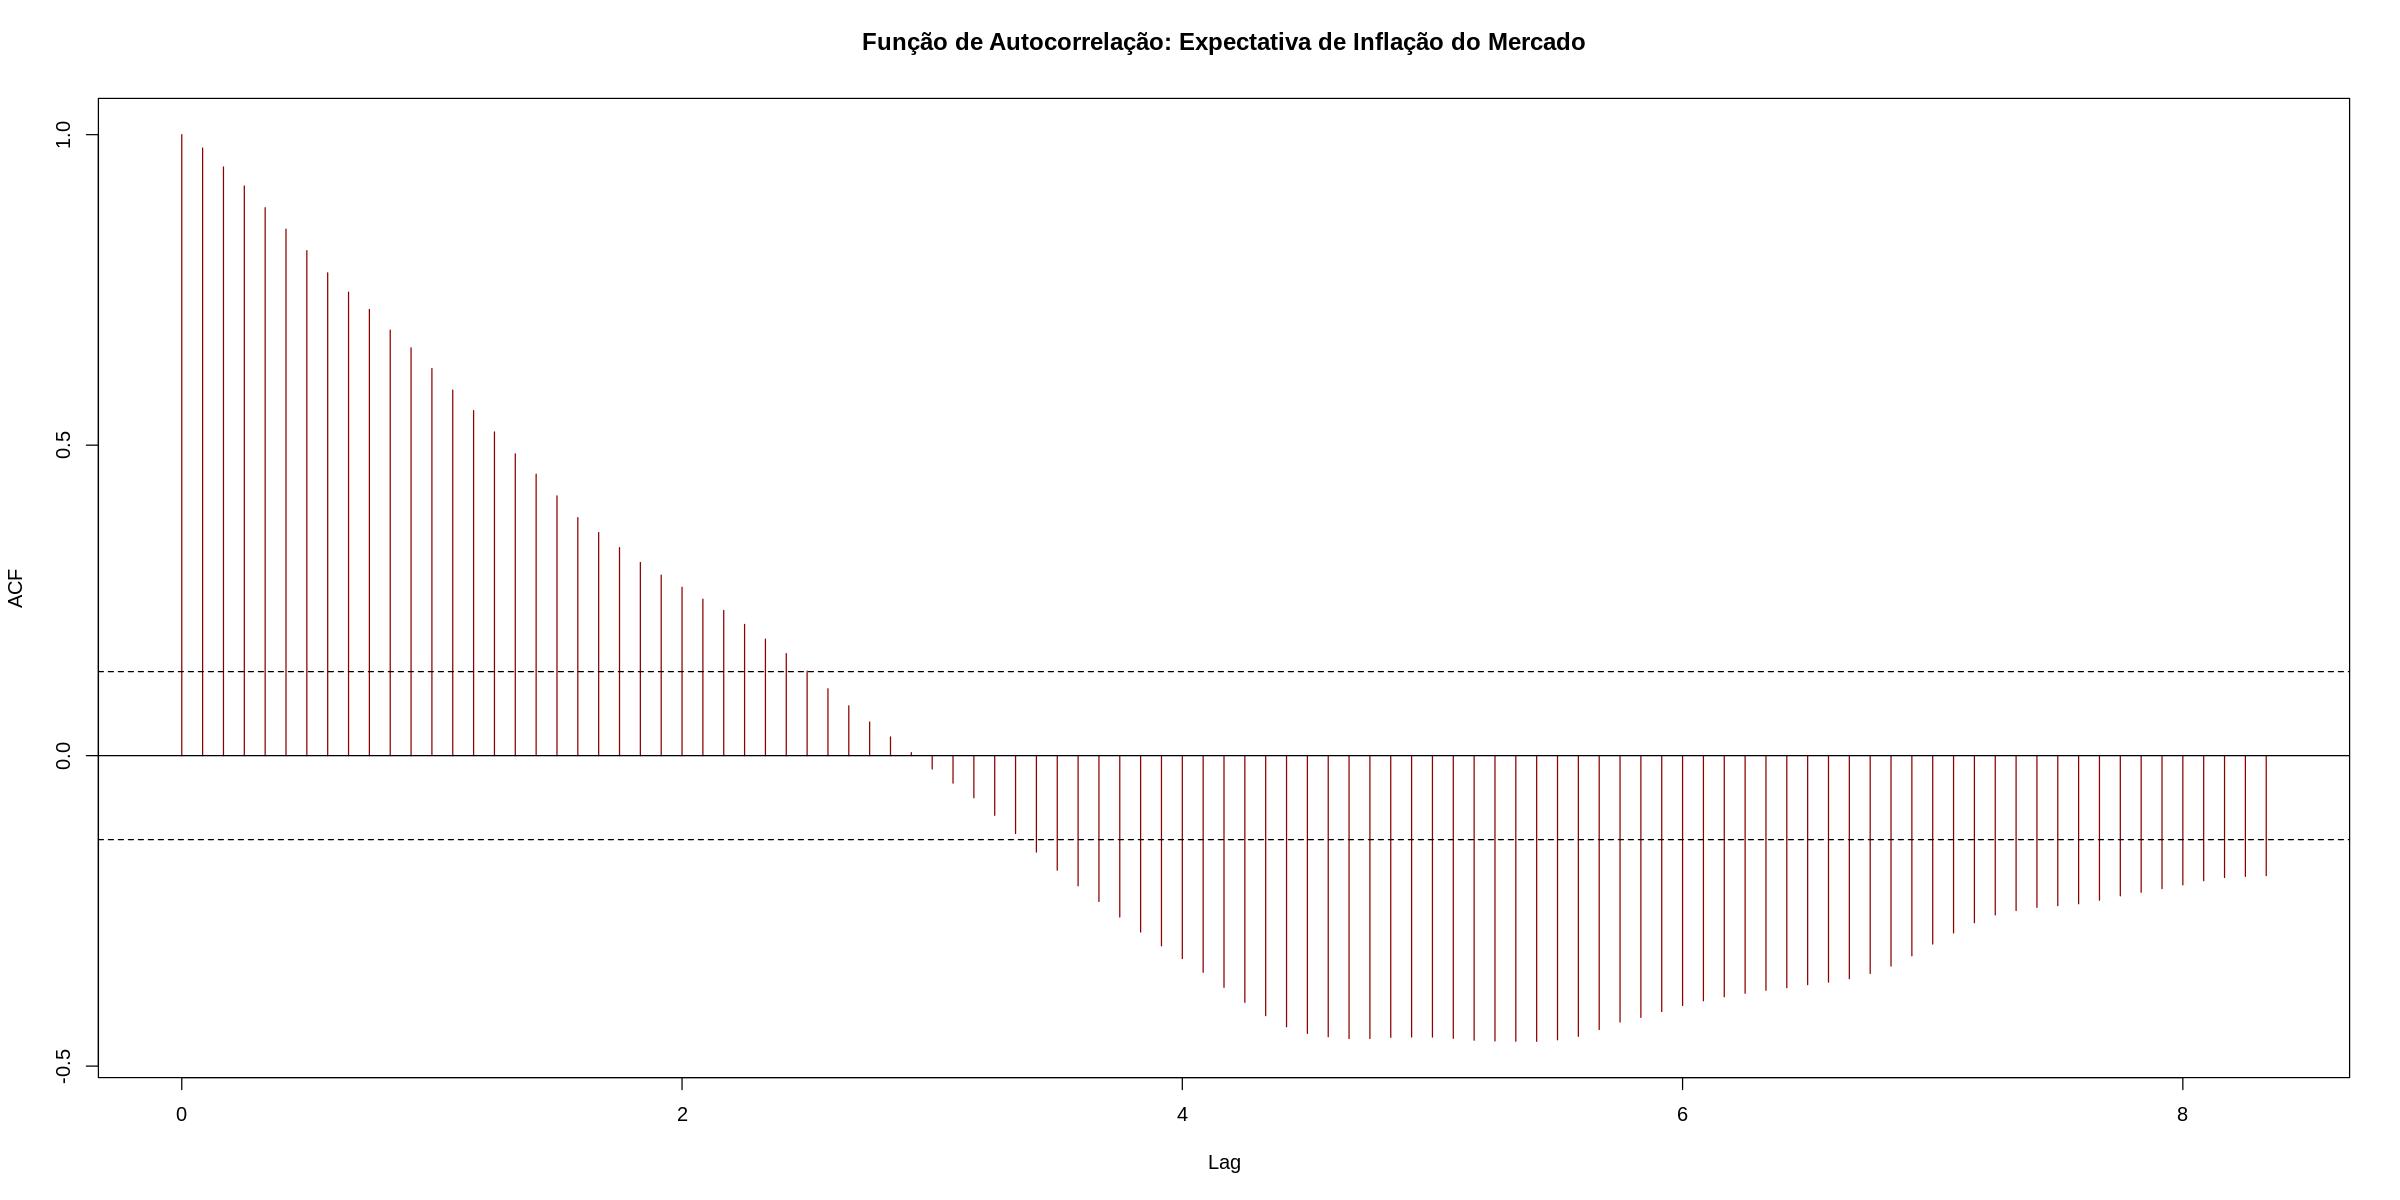

In [6]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Função de Autocorrelação
acf(df_public_data$market_inflation_expectation,
    main = "Função de Autocorrelação: Expectativa de Inflação do Mercado",
    col = "darkred",
    ci.col = "black",
    lag.max = 100)

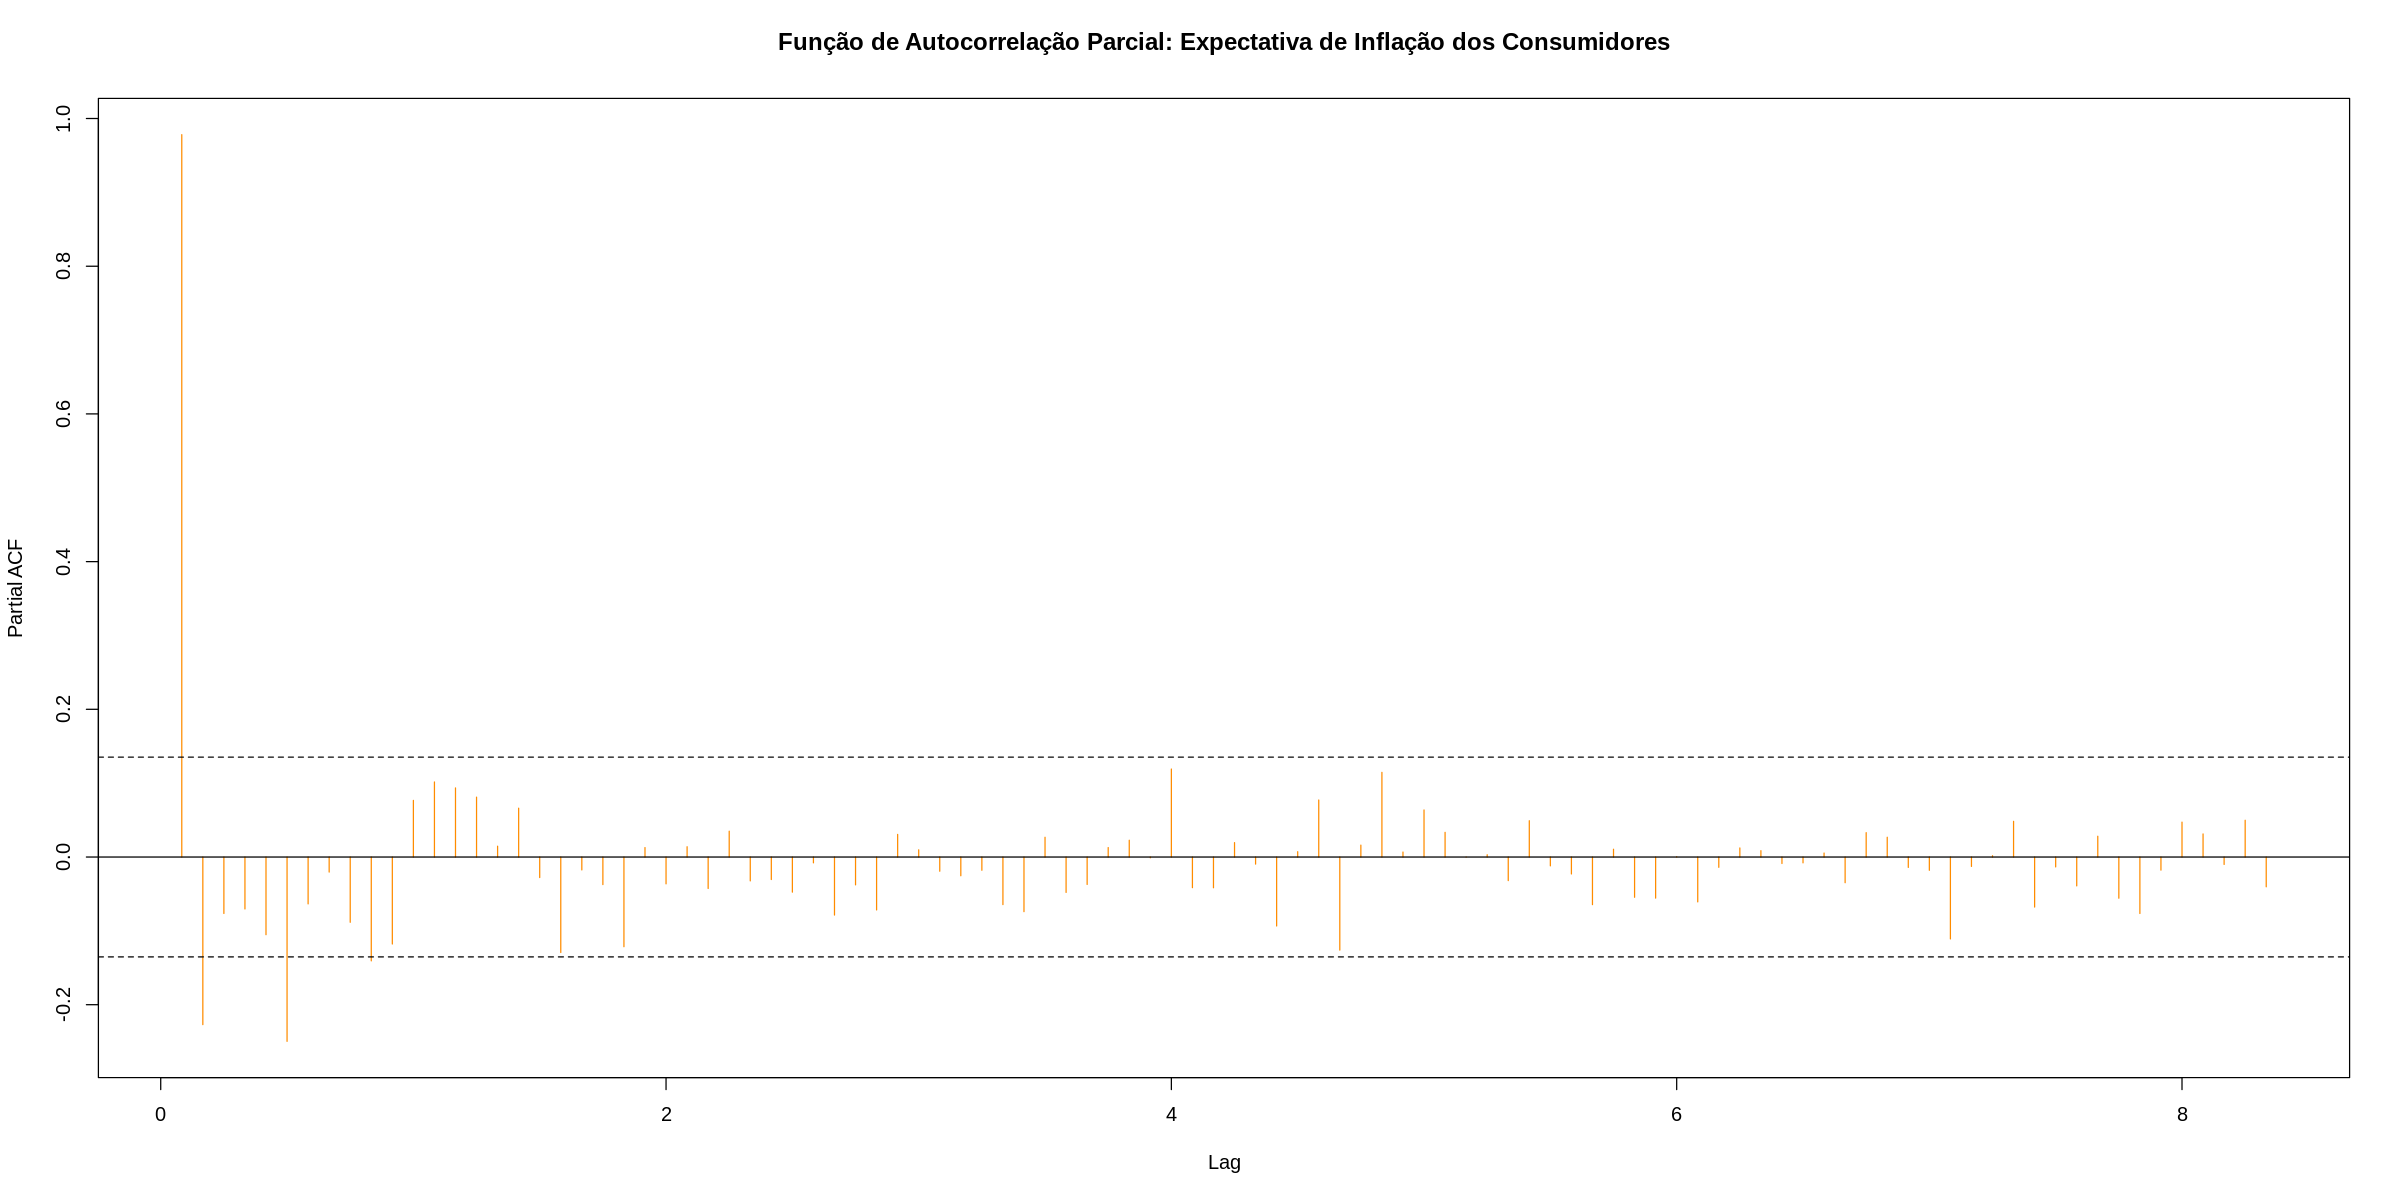

In [7]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Função de Autocorrelação Parcial
pacf(df_public_data$consumer_inflation_expectation,
    main = "Função de Autocorrelação Parcial: Expectativa de Inflação dos Consumidores",
    col = "darkorange",
    ci.col = "black",
    lag.max = 100)

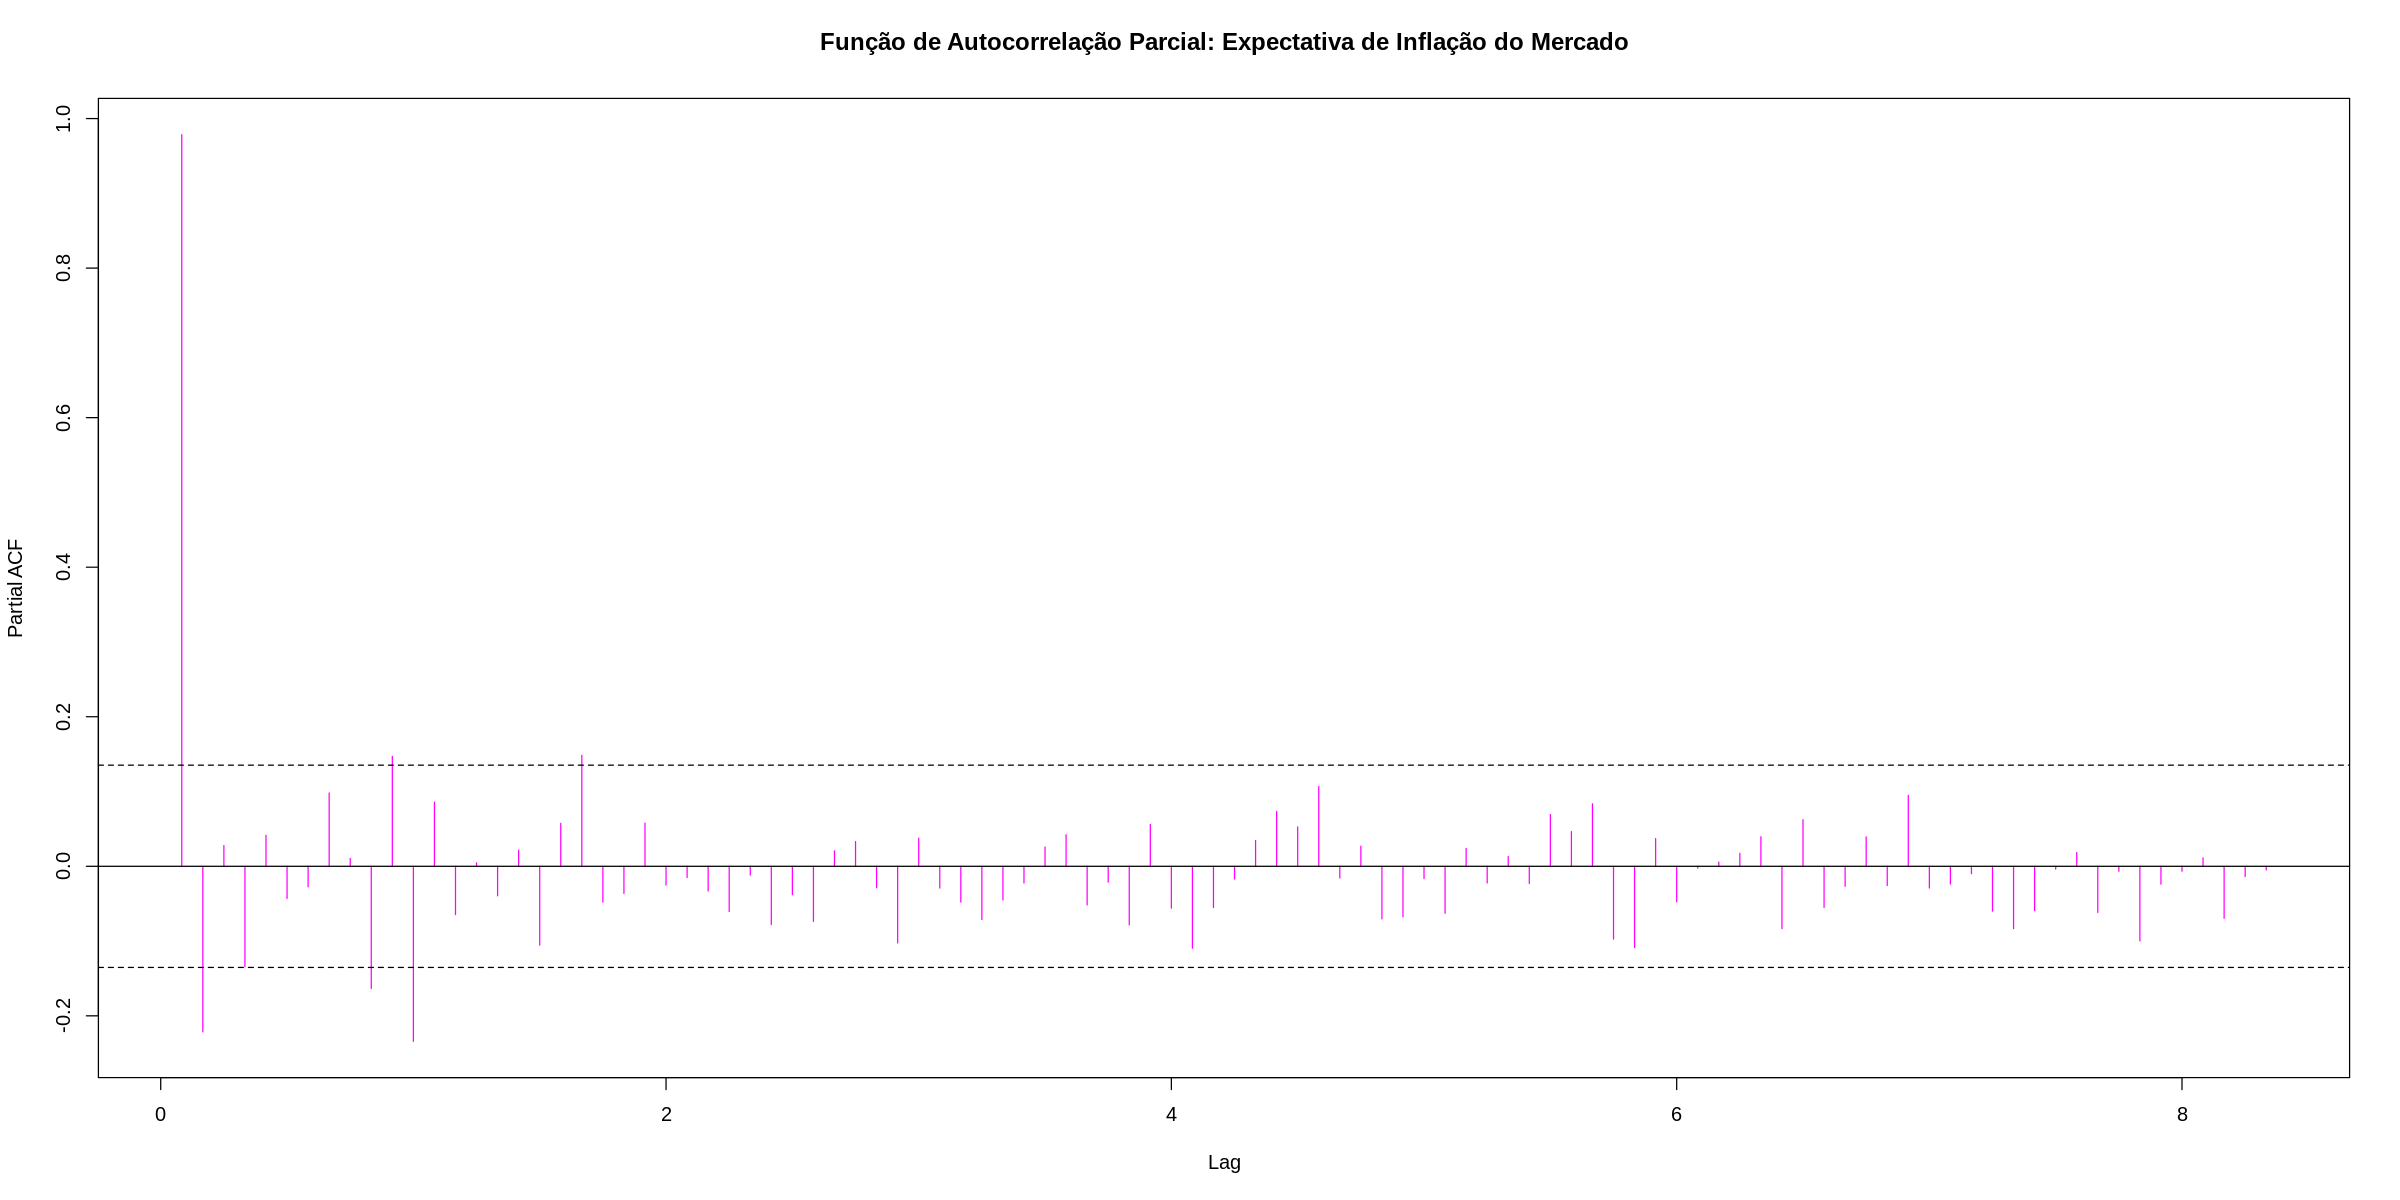

In [8]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Função de Autocorrelação Parcial
pacf(df_public_data$market_inflation_expectation,
    main = "Função de Autocorrelação Parcial: Expectativa de Inflação do Mercado",
    col = "magenta",
    ci.col = "black",
    lag.max = 100)

#### ADF (Augmented-Dickey-Fuller)

- $H_0$: possui raiz unitária

  * _tau3_: hipótese nula (raiz unitária)
  * _phi2_: hipótese nula (raiz unitária, sem tendência e sem drift)
  * _phi3_: hipótese nula (raiz unitária e sem tendência)

In [9]:
### Consumer Inflation Expectation
summary( ur.df( df_public_data$consumer_inflation_expectation, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09677 -0.18560 -0.00357  0.16660  0.94785 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)   0.3515298  0.1292630   2.719  0.00717 **
z.lag.1      -0.0534263  0.0184523  -2.895  0.00425 **
tt            0.0002051  0.0004114   0.499  0.61869   
z.diff.lag1   0.1955855  0.0717856   2.725  0.00707 **
z.diff.lag2   0.0156361  0.0723755   0.216  0.82920   
z.diff.lag3   0.1000963  0.0732853   1.366  0.17367   
z.diff.lag4  -0.0227473  0.0732961  -0.310  0.75665   
z.diff.lag5   0.2425796  0.0732023   3.314  0.00111 **
z.diff.lag6   0.0650533  0.0745469   0.873  0.38400   
z.diff.lag7   0.0350018  0.0735912   0.476  0.63491   
z.diff.lag8   0.0362034  0.0732818   0.494 

**Resultado**

- Como, em módulo, os valores de test-statistic são **menores** que tau3, phi2 e phi3, **não se rejeita** as hipóteses nulas para um nível de significância de 10%, ou seja, a série temporal **possui raiz unitária**, o que significa que é **não-estacionária**.

In [10]:
### Market Inflation Expectation
summary( ur.df( df_public_data$market_inflation_expectation, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68051 -0.09494  0.00893  0.10353  0.48780 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.1837407  0.0787683   2.333 0.020759 *  
z.lag.1      -0.0327461  0.0146501  -2.235 0.026619 *  
tt           -0.0002223  0.0002215  -1.004 0.316769    
z.diff.lag1   0.3703207  0.0731423   5.063 1.01e-06 ***
z.diff.lag2  -0.1145100  0.0775160  -1.477 0.141338    
z.diff.lag3   0.1836545  0.0754112   2.435 0.015841 *  
z.diff.lag4   0.0066769  0.0751151   0.089 0.929268    
z.diff.lag5   0.0026789  0.0743106   0.036 0.971281    
z.diff.lag6   0.0230546  0.0739968   0.312 0.755730    
z.diff.lag7  -0.0878857  0.0739289  -1.189 0.236072    
z.diff.lag8  -0.0963651  0.07425

**Resultado**

- Como, em módulo, os valores de test-statistic são **menores** que tau3, phi2 e phi3, **não se rejeita** as hipóteses nulas para um nível de significância de 10%, ou seja, a série temporal **possui raiz unitária**, o que significa que é **não-estacionária**.

#### KPSS

- $H_0$: não possui raiz unitária

In [11]:
### Consumer Inflation Expectation
summary( ur.kpss( df_public_data$consumer_inflation_expectation, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.2148 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como, em módulo, o valor de test-statistic é maior que o valor crítico, rejeita-se a hipótese nula para um nível de significância de 10%, ou seja, a série possui raiz unitária, o que significa que é não-estacionária.

In [12]:
### Market Inflation Expectation
summary( ur.kpss( df_public_data$market_inflation_expectation, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.5528 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como, em módulo, o valor de test-statistic é **maior** que o valor crítico, **rejeita-se** a hipótese nula para um nível de significância de 10%, ou seja, a série **possui raiz unitária**, o que significa que é **não-estacionária**.

### **Induzir Estacionariedade**

In [13]:
diff_consumer_inflation_expectation = diff( df_public_data$consumer_inflation_expectation )
diff_market_inflation_expectation = diff( df_public_data$market_inflation_expectation )

df_public_data_diff <- data.frame( month = time( diff_consumer_inflation_expectation ), diff_consumer_inflation_expectation, diff_market_inflation_expectation)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


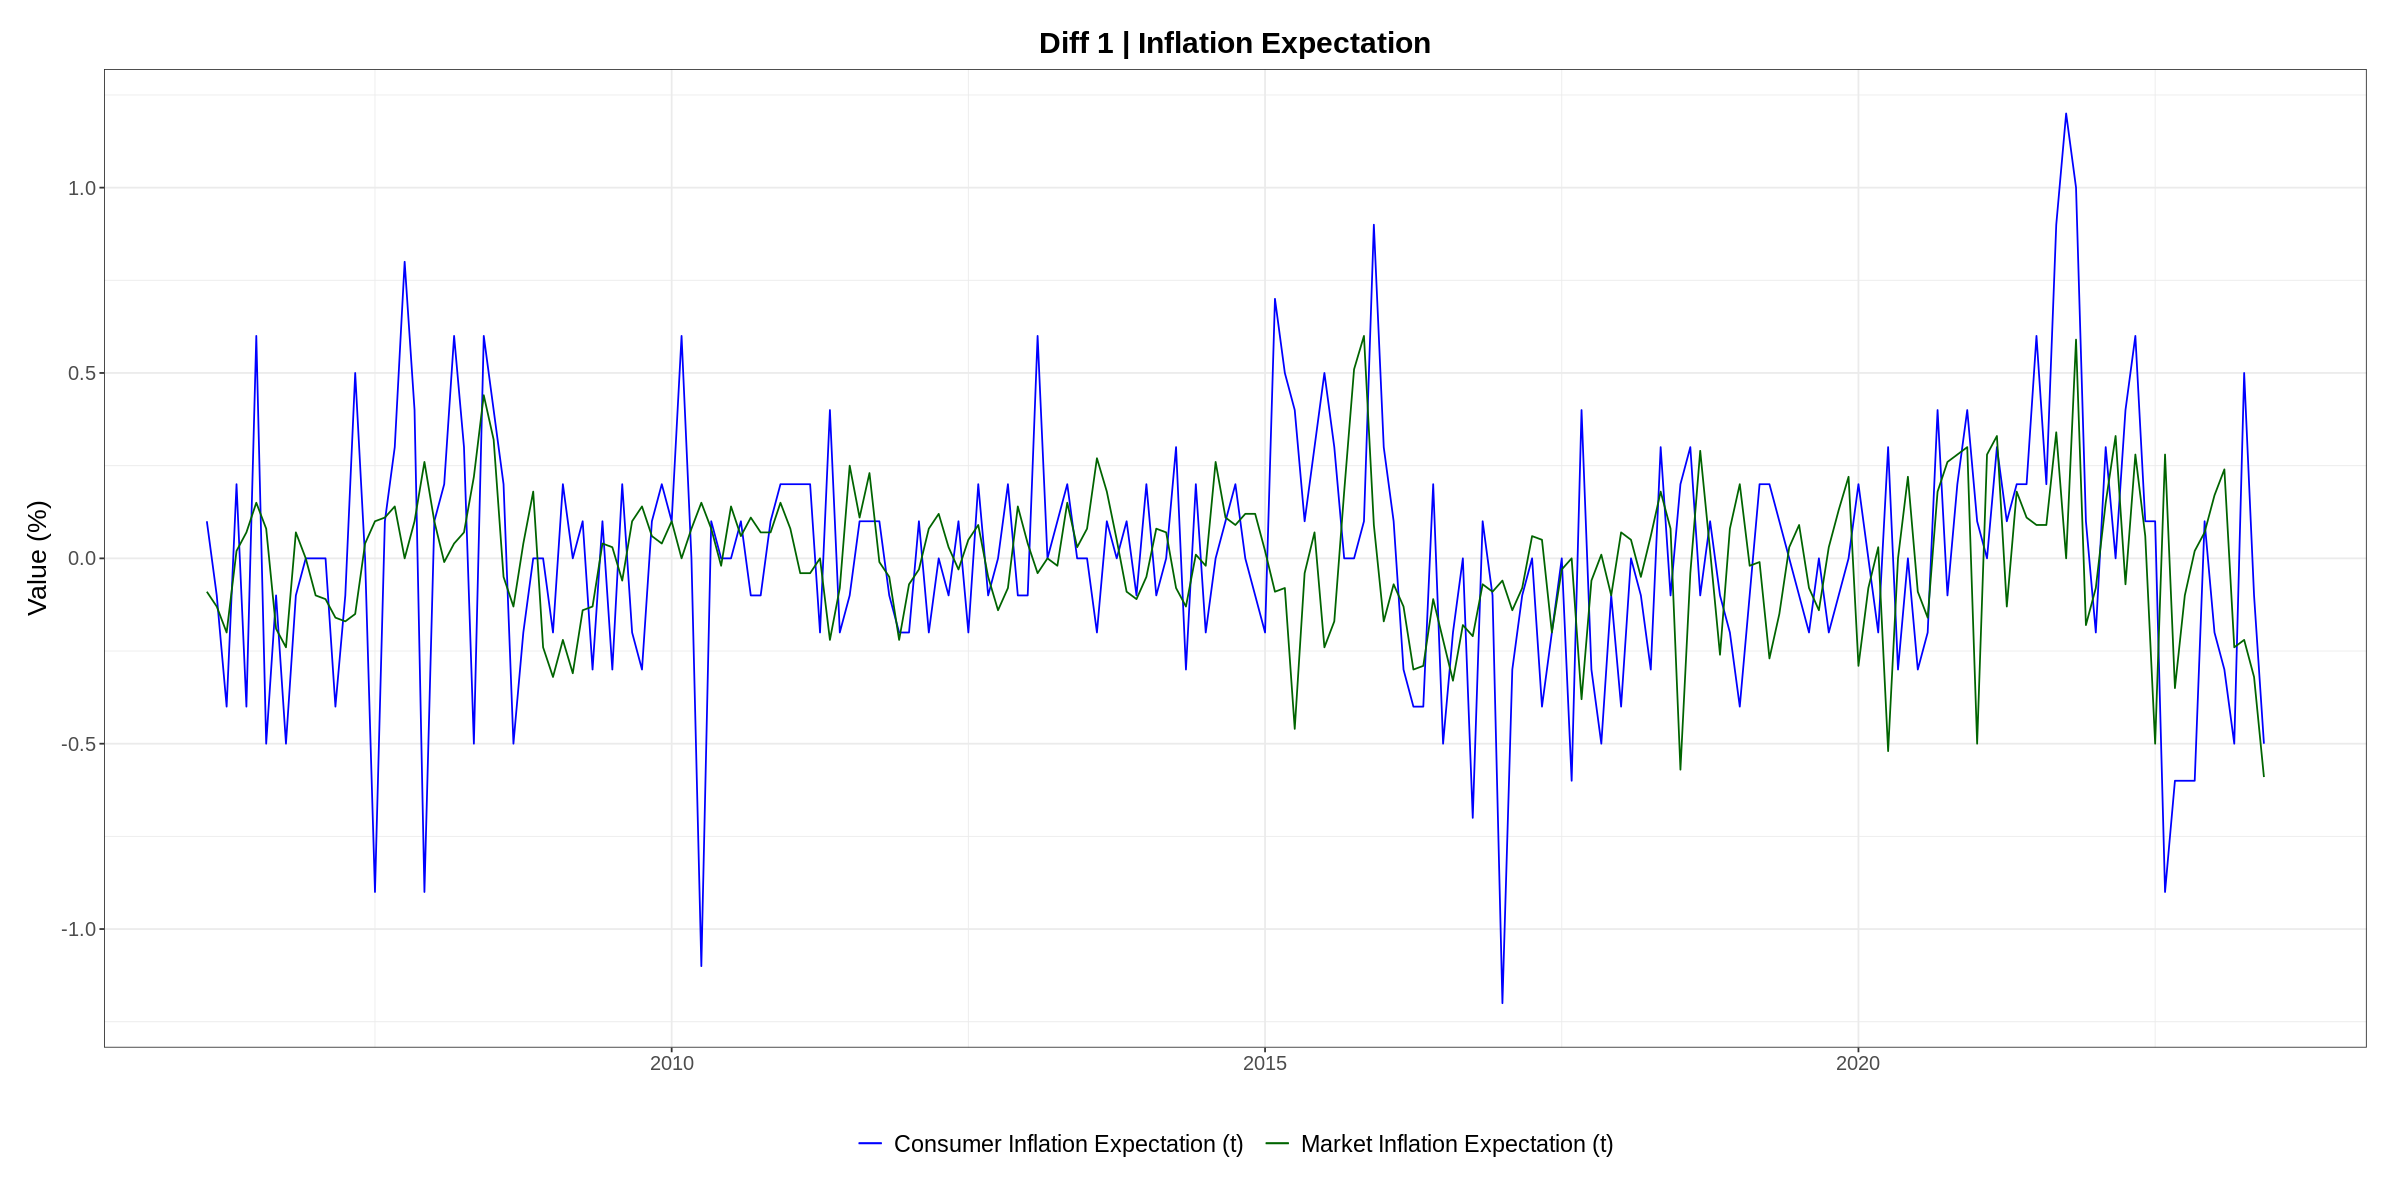

In [14]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Plotar as séries temporais de "consumer_inflation_expectation" e "market_inflation_expectation"
ggplot(df_public_data_diff) +
  geom_line(aes(x = month, y = diff_consumer_inflation_expectation, color = "Consumer Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = diff_market_inflation_expectation, color = "Market Inflation Expectation (t)")) +
  labs(x = "", y = "Value (%)", title = "Diff 1 | Inflation Expectation") +
  scale_color_manual(values = c("blue", "darkgreen"), name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 14),
    legend.title = element_blank(),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )

#### ADF (Augmented-Dickey-Fuller)

- $H_0$: possui raiz unitária

  * _tau3_: hipótese nula (raiz unitária)
  * _phi2_: hipótese nula (raiz unitária, sem tendência e sem drift)
  * _phi3_: hipótese nula (raiz unitária e sem tendência)

In [15]:
### Consumer Inflation Expectation
summary( ur.df( df_public_data_diff$diff_consumer_inflation_expectation, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.12882 -0.15898  0.00344  0.17210  0.95045 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.321e-04  5.110e-02   0.003 0.997941    
z.lag.1      -7.039e-01  1.643e-01  -4.284 2.98e-05 ***
tt            9.007e-05  4.166e-04   0.216 0.829056    
z.diff.lag1  -1.253e-01  1.601e-01  -0.782 0.434978    
z.diff.lag2  -1.341e-01  1.568e-01  -0.855 0.393512    
z.diff.lag3  -2.687e-02  1.578e-01  -0.170 0.865020    
z.diff.lag4  -5.173e-02  1.559e-01  -0.332 0.740488    
z.diff.lag5   1.794e-01  1.529e-01   1.173 0.242199    
z.diff.lag6   2.190e-01  1.492e-01   1.468 0.143822    
z.diff.lag7   2.357e-01  1.468e-01   1.606 0.110113    
z.diff.lag8   2.592e-01  1.412e-

**Resultado**

- Como, em módulo, os valores de test-statistic são **maiores** que tau3, phi2 e phi3, **rejeita-se** as hipóteses nulas para um nível de significância de 10%, ou seja, a série temporal **não possui raiz unitária**, o que significa que é **estacionária**.

In [16]:
### Market Inflation Expectation
summary( ur.df( df_public_data_diff$diff_market_inflation_expectation, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67248 -0.10017  0.00189  0.10440  0.45024 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)   0.0210877  0.0279321   0.755  0.45125   
z.lag.1      -0.6595802  0.1984075  -3.324  0.00107 **
tt           -0.0001825  0.0002250  -0.811  0.41841   
z.diff.lag1   0.0246003  0.1937529   0.127  0.89911   
z.diff.lag2  -0.1110179  0.1878525  -0.591  0.55527   
z.diff.lag3   0.0619693  0.1756362   0.353  0.72463   
z.diff.lag4   0.0414614  0.1688426   0.246  0.80630   
z.diff.lag5   0.0215485  0.1551823   0.139  0.88972   
z.diff.lag6   0.0293766  0.1455911   0.202  0.84032   
z.diff.lag7  -0.0707812  0.1379464  -0.513  0.60850   
z.diff.lag8  -0.1790128  0.1297954  -1.379 

**Resultado**

- Como, em módulo, os valores de test-statistic são **maiores** que tau3 e phi3, mas não que phi2, **rejeita-se** 2 das 3 hipóteses nulas para um nível de significância de 10%, ou seja, a série temporal **não possui raiz unitária**, o que significa que é **estacionária**, mas a série é **não estacionária** após a segunda diferenciação.

#### KPSS

- $H_0$: não possui raiz unitária

In [17]:
### Consumer Inflation Expectation
summary( ur.kpss( df_public_data_diff$diff_consumer_inflation_expectation, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.0698 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como, em módulo, o valor de test-statistic é **menor** que o valor crítico, **não se rejeita** a hipótese nula para um nível de significância de 10%, ou seja, a série **não possui raiz unitária**, o que significa que é **estacionária**.

In [18]:
### Market Inflation Expectation
summary( ur.kpss( df_public_data_diff$diff_market_inflation_expectation, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.0661 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como, em módulo, o valor de test-statistic é **menor** que o valor crítico, **não se rejeita** a hipótese nula para um nível de significância de 10%, ou seja, a série **não possui raiz unitária**, o que significa que é **estacionária**.